<a href="https://colab.research.google.com/github/polakamal/17Category-Flower-Dataset/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,shutil
import cv2
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
from tensorflow.python.framework import ops  # ops (short for operations)
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import mahotas
from sklearn.preprocessing import LabelEncoder
ops.reset_default_graph()

In [ ]:
Idef fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [ ]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [ ]:
# feature-descriptor-3: Color Histogram
bins = 8
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()


In [ ]:
dir1=  "/content/drive/My Drive/Colab Notebooks"
labels = []
images = []
global_features  = []
dir=  "/content/drive/My Drive/Colab Notebooks/images/jpg"
for folder in os.listdir(dir):
  dir2 = os.path.join(dir,folder)
  current_label = folder
  for img in os.listdir(dir2):
   img = cv2.imread(os.path.join(dir2,img))
   img = cv2.resize(img,(256,256))
   fv_hu_moments = fd_hu_moments(img)
   fv_haralick   = fd_haralick(img)
   fv_histogram  = fd_histogram(img)
   global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
   images.append(img)
   global_features.append(global_feature)
   labels.append(current_label)
   
   


fritillary


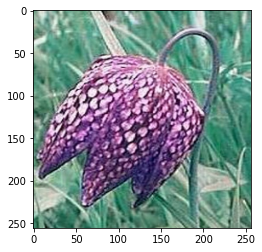

In [ ]:
print(labels[0])
plt.imshow(images[0])


In [ ]:
targetNames = np.unique(labels)
le          = LabelEncoder()
label      = le.fit_transform(labels)

4
crocus


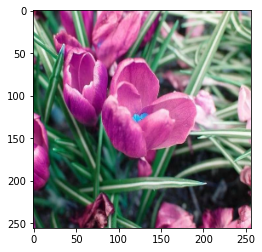

In [ ]:
print(label[80])
print(labels[80])
plt.imshow(images[80])
plt.show()

In [ ]:
global_features = np.array(global_features)
label = np.array(label)
train_x,test_x,train_y,test_y = train_test_split(global_features,label,test_size=0.4,random_state=100,shuffle= True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [ ]:
tf.disable_eager_execution()
sess = tf.Session()
test_y = sess.run(tf.one_hot(test_y, 17 ))
train_y = sess.run(tf.one_hot(train_y , 17))
sess.close()

In [ ]:
epochs = 30
batch_size = 100
batches = int(test_x.shape[0]/ batch_size)
print(batches)
print(test_x.shape)
print(train_x.shape)

5
(544, 532)
(816, 532)


In [ ]:
X=tf.placeholder(tf.float32,shape=(None,532))
Y=tf.placeholder(tf.float32, [None,17])
W = tf.Variable(.1 * np.random.randn(532, 17).astype(np.float32))
B = tf.Variable(.1 * np.random.randn(17).astype(np.float32))

In [ ]:
learning_rate = 0.1
pred = tf.nn.softmax(tf.add(tf.matmul(X,W), B))
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = train_x[offset: offset + batch_size]
            y = train_y[offset: offset + batch_size]
            sesh.run(optimizer, feed_dict={X: x, Y:y})
            c = sesh.run(cost, feed_dict={X:x, Y:y})
        print(f'epoch:{epoch:2d} cost={c:.4f}')
                
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: test_x, Y: test_y})
    print(f'Accuracy: {acc * 100:.2f}%')
    predict = sesh.run(pred,feed_dict={X: test_x, Y:test_y})

epoch: 0 cost=1.9178
epoch: 1 cost=1.2045
epoch: 2 cost=0.9475
epoch: 3 cost=0.8324
epoch: 4 cost=0.8441
epoch: 5 cost=0.8268
epoch: 6 cost=0.8253
epoch: 7 cost=0.7838
epoch: 8 cost=0.7029
epoch: 9 cost=0.6584
epoch:10 cost=0.6502
epoch:11 cost=0.6774
epoch:12 cost=0.6770
epoch:13 cost=0.6288
epoch:14 cost=0.6100
epoch:15 cost=0.8161
epoch:16 cost=0.7981
epoch:17 cost=0.7594
epoch:18 cost=0.8366
epoch:19 cost=0.9170
epoch:20 cost=0.8397
epoch:21 cost=0.7124
epoch:22 cost=0.7905
epoch:23 cost=0.8513
epoch:24 cost=0.8316
epoch:25 cost=0.8535
epoch:26 cost=0.8429
epoch:27 cost=0.8228
epoch:28 cost=0.8827
epoch:29 cost=0.8801
Accuracy: 31.62%


In [ ]:
predClass = np.argmax(predict , 1)
true_label = np.argmax(test_y,1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(true_label,predClass)

In [ ]:
print(confusion_matrix)

[[13  0  1  5  0  1  0  0  0  8  2  1  2  0  1  1  1]
 [ 2  4  2  3  0  1  2 12  0  0  4  1  0  2  1  1  0]
 [ 0  0  9  1  0  3  0  3  0  1  0  0  0  1  1  9  0]
 [ 0  0  1 11  0  0  0  3  0  1  2  1  3  3  1  3  1]
 [ 4  0  1  1 12  0  3  0  1  3  1  3  3  0  1  2  0]
 [ 1  0  1  3  0  4  1  8  0  0  1  2  0  1  3  5  2]
 [ 0  1  0  0  0  0  7  1  0  1  0  0  4  0  0  0 13]
 [ 0  1  6  3  0  0  0 18  0  1  1  0  0  4  1  2  0]
 [ 0  0  1  0  2  0  0  0 15  4  0  2  2  0  2  0  2]
 [ 3  1  0  0  2  0  0  2  0 12  1  1  0  2  5  3  5]
 [ 1  1  0  4  1  2  1  1  0  1 12  2  0  0  4  2  0]
 [ 6  1  0  2  1  0  2  0  0  2  3 10  0  1  0  1  1]
 [ 3  1  0  4  4  4  0  0  0  1  4  1  2  0  0  2  6]
 [ 1  2  0  1  1  2  0 10  0  0  0  0  0 15  1  0  0]
 [ 1  1  1  4  0  1  1  2  0  3  0  1  0  1  9  5  1]
 [ 0  3  2  1  0  7  0  2  0  0  0  0  2  0  0  6  0]
 [ 0  1  0  3  0  1  8  0  0  0  2  0  4  0  1  3 13]]
